In [1]:
!pip install datatable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96.6 MB 1.1 MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import datatable as dt
get_ipython().run_line_magic('matplotlib', 'inline')

In [36]:
datatable_df = dt.fread("/content/household_power_consumption.txt")

In [37]:
# Convert Datatable into Pandas Dataframe
df = datatable_df.to_pandas()

In [38]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [39]:
df.shape

(1026739, 9)

In [40]:
# SAMPLING.  Take 100000 samples out of 20752595
df=df.sample(100000).reset_index().drop('index',axis=1)

In [41]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,15/2/2008,10:34:00,1.410,0.046,239.130,5.800,0.000,0.000,18.0
1,31/8/2008,07:37:00,0.088,0.000,241.050,0.400,0.000,0.000,1.0
2,4/7/2007,11:50:00,0.216,0.090,238.160,1.000,0.000,1.000,0.0
3,15/7/2007,08:49:00,0.390,0.096,241.460,1.600,0.000,0.000,0.0
4,26/5/2008,15:01:00,0.440,0.156,243.490,2.000,0.000,0.000,0.0


In [42]:
'''from google.colab import files
df.to_csv('household_power_consumption_100000_samples.csv')
files.download('household_power_consumption_100000_samples.csv')'''


url = 'https://raw.githubusercontent.com/subhashdixit/Regression_Model_Tasks/main/Household_Power_Consumption_Regression_Problem/household_power_consumption_100000_samples.csv'
df = pd.read_csv(url)

In [43]:
# Read Data From GitHub
url = 'https://raw.githubusercontent.com/subhashdixit/Regression_Model_Tasks/main/Household_Power_Consumption_Regression_Problem/household_power_consumption_100000_samples.csv'
df = pd.read_csv(url)

In [44]:
df.head()

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,23/9/2007,20:53:00,4.548,0.048,233.920,19.400,36.000,0.000,17.0
1,1,16/6/2008,05:44:00,0.332,0.266,240.490,1.800,0.000,1.000,1.0
2,2,20/7/2010,11:26:00,0.456,0.300,241.510,2.400,0.000,0.000,0.0
3,3,21/5/2008,07:58:00,1.402,0.110,238.880,5.800,0.000,0.000,18.0
4,4,16/6/2007,13:07:00,1.662,0.114,240.190,7.000,0.000,1.000,17.0


In [45]:
df.columns

Index(['Unnamed: 0', 'Date', 'Time', 'Global_active_power',
       'Global_reactive_power', 'Voltage', 'Global_intensity',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'],
      dtype='object')

In [46]:
# Drop "Unnamed: 0" column because it is of no use
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   100000 non-null  object 
 1   Time                   100000 non-null  object 
 2   Global_active_power    100000 non-null  object 
 3   Global_reactive_power  100000 non-null  object 
 4   Voltage                100000 non-null  object 
 5   Global_intensity       100000 non-null  object 
 6   Sub_metering_1         100000 non-null  object 
 7   Sub_metering_2         100000 non-null  object 
 8   Sub_metering_3         98733 non-null   float64
dtypes: float64(1), object(8)
memory usage: 6.9+ MB


In [48]:
df['Date'] = pd.to_datetime(df['Date'])

In [49]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [50]:
df.drop(['Time'], axis = 1, inplace = True)

In [51]:
df.head

<bound method NDFrame.head of             Date Global_active_power Global_reactive_power  Voltage  \
0     2007-09-23               4.548                 0.048  233.920   
1     2008-06-16               0.332                 0.266  240.490   
2     2010-07-20               0.456                 0.300  241.510   
3     2008-05-21               1.402                 0.110  238.880   
4     2007-06-16               1.662                 0.114  240.190   
...          ...                 ...                   ...      ...   
99995 2009-07-25               0.718                 0.152  243.390   
99996 2007-05-18               5.974                 0.322  227.950   
99997 2009-11-03               3.618                 0.160  243.050   
99998 2009-12-15               1.518                 0.000  247.670   
99999 2008-02-13               0.350                 0.134  244.620   

      Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0               19.400         36.000         

In [52]:
df.isnull().sum()

Date                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           1267
dtype: int64

In [53]:
df.duplicated().sum()

1326

In [54]:
df.drop_duplicates(inplace = True)

In [55]:
df.columns

Index(['Date', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [56]:
df['Sub_metering_1'].unique()

array(['36.000', '0.000', '2.000', '?', '3.000', '1.000', '37.000',
       '12.000', '13.000', '7.000', '33.000', '38.000', '39.000', '0.0',
       '40.000', '19.000', '31.000', '14.000', '29.000', '42.000',
       '35.000', '8.000', '5.000', '27.000', '18.000', '10.000', '16.000',
       '1.0', '9.000', '6.000', '21.000', '25.000', '43.000', '34.000',
       '52.000', '22.000', '11.000', '49.000', '41.000', '51.000',
       '24.000', '32.000', '44.000', '23.000', '47.000', '30.000',
       '15.000', '76.000', '53.000', '26.000', '20.000', '37.0', '28.000',
       '17.000', '2.0', '4.000', '45.000', '79.000', '38.0', '48.000',
       '78.000', '73.000', '75.000', '12.0', '74.000', '77.000', '46.000',
       '70.000', '54.000', '71.000', '67.000', '50.000', '60.000',
       '72.000', '9.0', '55.000'], dtype=object)

In [57]:
df.replace('?', np.nan, inplace=True)

In [58]:
df.isnull().sum()

Date                      0
Global_active_power      29
Global_reactive_power    29
Voltage                  29
Global_intensity         29
Sub_metering_1           29
Sub_metering_2           29
Sub_metering_3           29
dtype: int64

In [59]:
df.fillna(df.median().round(1), inplace=True)

<ipython-input-59-8e2a8cac0699>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.median().round(1), inplace=True)


In [60]:
df.isnull().sum()

Date                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [61]:
conversion = {'Global_active_power' : 'float64', 'Global_reactive_power'  : 'float64', 'Voltage' : 'float64',
       'Global_intensity' : 'float64', 'Sub_metering_1' : 'float64', 'Sub_metering_2' : 'float64',
       'Sub_metering_3' : 'float64'}
df = df.astype(conversion)

In [62]:
df= df.groupby('Date').sum()

In [63]:
df.reset_index(inplace = True)

In [64]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month

In [65]:
df.groupby('year').sum()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,month
year,,,,,,,,
2006,2089.234,145.794,266246.20,8834.6,1319.0,2443.0,7970.0,192
2007,27957.188,2934.968,6027954.66,119263.0,32306.0,41834.0,144128.0,2382
2008,27071.242,2976.926,6106965.96,114932.4,27497.0,32388.0,152030.0,2384
2009,26949.936,3304.990,6048416.02,113869.4,27616.0,27921.0,171180.0,2382
2010,23385.046,2868.562,5315537.51,98737.0,21101.0,24204.0,158865.0,2032


In [66]:
df.groupby('month').sum()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year
month,,,,,,,,
1,11010.708,948.304,2007667.97,46397.0,11270.0,10824.0,61552.0,247044
2,8152.446,821.946,1828442.49,34349.2,6770.0,9704.0,46932.0,224950
3,9747.036,988.760,2019103.08,41145.0,10014.0,13379.0,58751.0,247044
4,8476.136,1001.732,1956734.97,35929.8,8530.0,10991.0,50919.0,239010
5,8809.694,1078.724,2002497.07,37616.8,10187.0,11647.0,55326.0,247044
6,7886.670,1171.686,1960283.14,33827.4,9297.0,10440.0,49969.0,239010
7,6922.470,1138.696,2034762.85,29847.2,6263.0,9510.0,41611.0,247044
8,6931.770,1129.082,1985413.10,29771.6,7099.0,9424.0,44363.0,247044
9,8495.682,1050.424,1949014.65,36148.4,10411.0,10226.0,51869.0,239010


In [67]:
df.shape

(1442, 10)

In [68]:
df = df[df['Date']>'2006-12-31']

In [69]:
df.shape

(1426, 10)

In [70]:
df.isnull().sum()

Date                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
year                     0
month                    0
dtype: int64

In [71]:
a = (df['Global_active_power']*1000/60)
b = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
df['power_consumption'] = a - b
df.head()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,power_consumption
16,2007-01-01,136.092,8.790,17063.52,563.4,0.0,17.0,209.0,2007,1,2042.200000
17,2007-01-02,96.230,7.922,20438.87,403.2,8.0,14.0,681.0,2007,1,900.833333
18,2007-01-03,25.416,4.938,17871.77,105.0,0.0,15.0,89.0,2007,1,319.600000
19,2007-01-04,97.752,8.124,14654.69,410.4,88.0,130.0,795.0,2007,1,616.200000
20,2007-01-05,72.016,7.874,15283.45,316.2,338.0,28.0,300.0,2007,1,534.266667


In [72]:
df['Sub_metering']=df['Sub_metering_1']+df['Sub_metering_2']+df['Sub_metering_3']



In [73]:
df = df.drop(['Sub_metering_1','Sub_metering_2','Sub_metering_3'],axis=1)

In [74]:
df.head()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,year,month,power_consumption,Sub_metering
16,2007-01-01,136.092,8.790,17063.52,563.4,2007,1,2042.200000,226.0
17,2007-01-02,96.230,7.922,20438.87,403.2,2007,1,900.833333,703.0
18,2007-01-03,25.416,4.938,17871.77,105.0,2007,1,319.600000,104.0
19,2007-01-04,97.752,8.124,14654.69,410.4,2007,1,616.200000,1013.0
20,2007-01-05,72.016,7.874,15283.45,316.2,2007,1,534.266667,666.0


In [75]:
df.isnull().sum()

Date                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
year                     0
month                    0
power_consumption        0
Sub_metering             0
dtype: int64

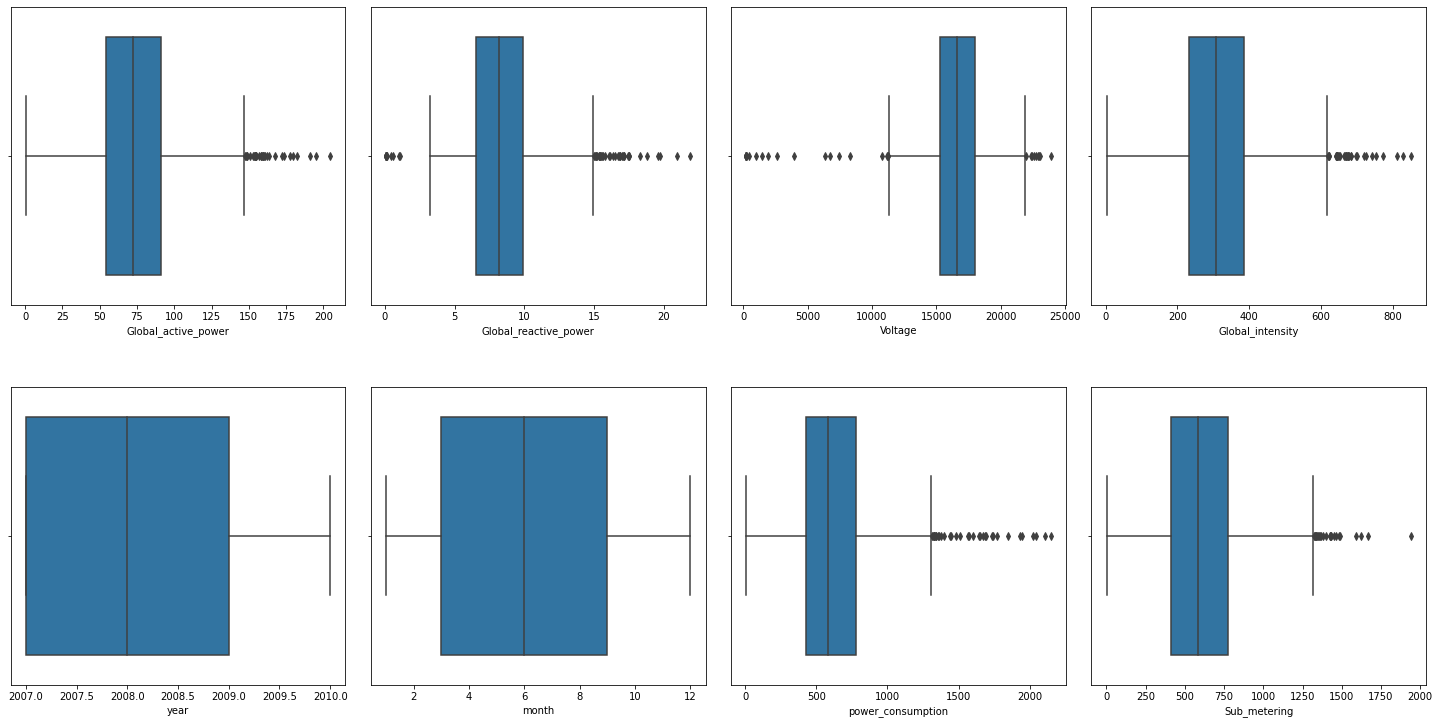

In [76]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
  if col!='Date':
    sns.boxplot(x = col, data = df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [77]:
def find_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR*distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR*distance)
    return upper_boundary, lower_boundary

In [78]:
outliers_columns = ['Global_active_power', 'Global_reactive_power','Voltage','Global_intensity','power_consumption','Sub_metering']
for i in outliers_columns:
    upper_boundary, lower_boundary = find_boundaries(df,i, 1.5)
    outliers = np.where(df[i] > upper_boundary, True, np.where(df[i] < lower_boundary, True, False))
    outliers_df = df.loc[outliers, i]
    df_trimed= df.loc[~outliers, i]
    df[i] = df_trimed

In [79]:
df.isnull().sum()

Date                      0
Global_active_power      32
Global_reactive_power    49
Voltage                  33
Global_intensity         31
year                      0
month                     0
power_consumption        34
Sub_metering             24
dtype: int64

In [80]:
df.fillna(df.median().round(1), inplace=True)

<ipython-input-80-8e2a8cac0699>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.median().round(1), inplace=True)


In [81]:
df.dropna(inplace = True)

In [82]:
df.isnull().sum()

Date                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
year                     0
month                    0
power_consumption        0
Sub_metering             0
dtype: int64

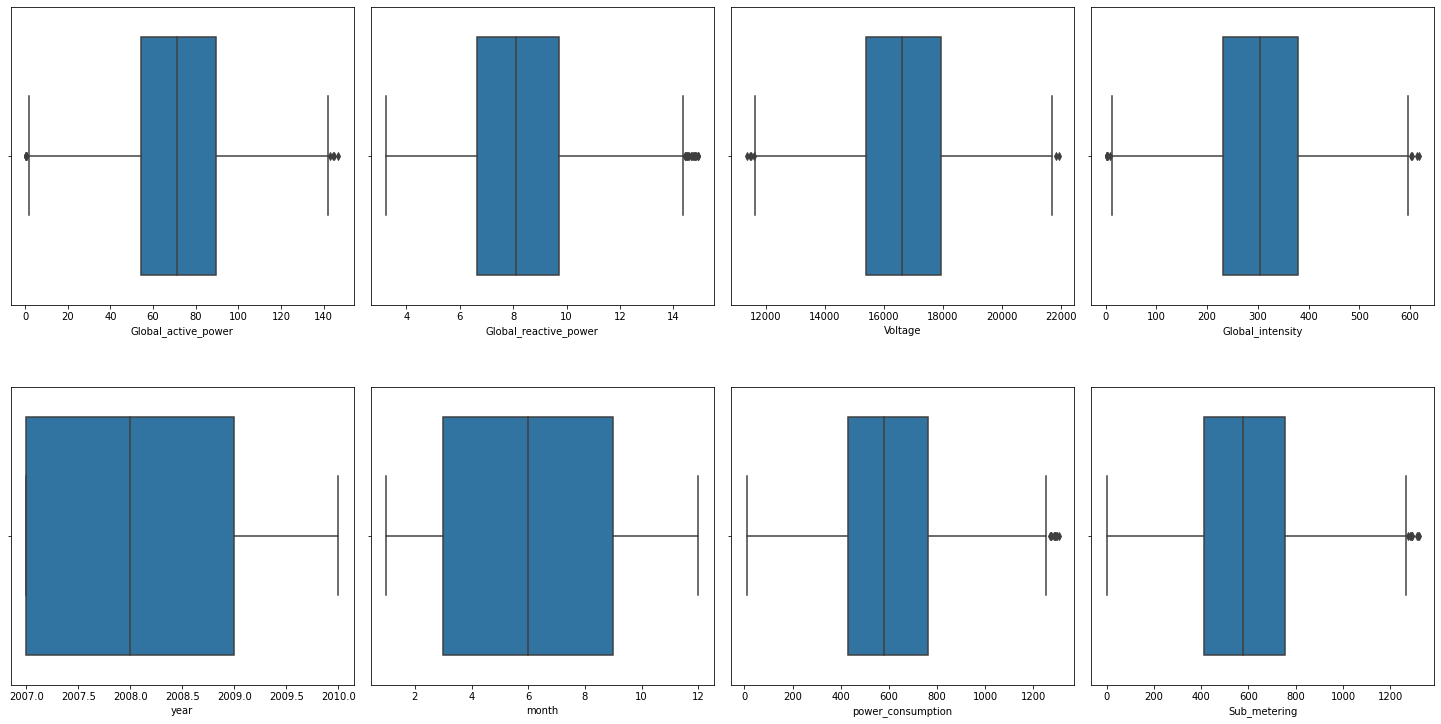

In [83]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if col!='Date':
        sns.boxplot(x = col, data = df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

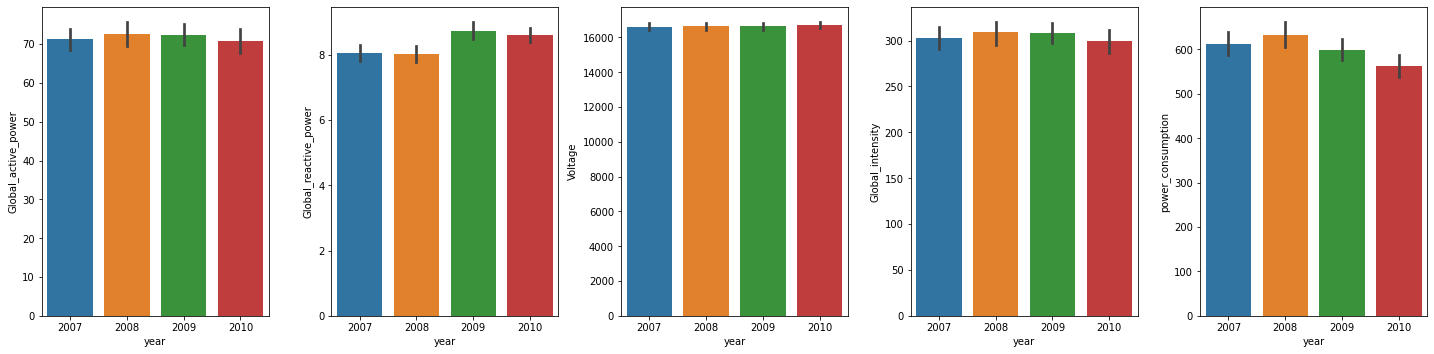

In [84]:
fig, ax = plt.subplots(ncols = 5, nrows = 1, figsize=(20,5))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if col not in ['Date', 'year', 'month']:
        sns.barplot(y = df[col], x = df['year'], data = df, ax=ax[index] )
        index += 1 
    if index == 5:
        break 
plt.tight_layout(pad=1, w_pad=1, h_pad=10.0)

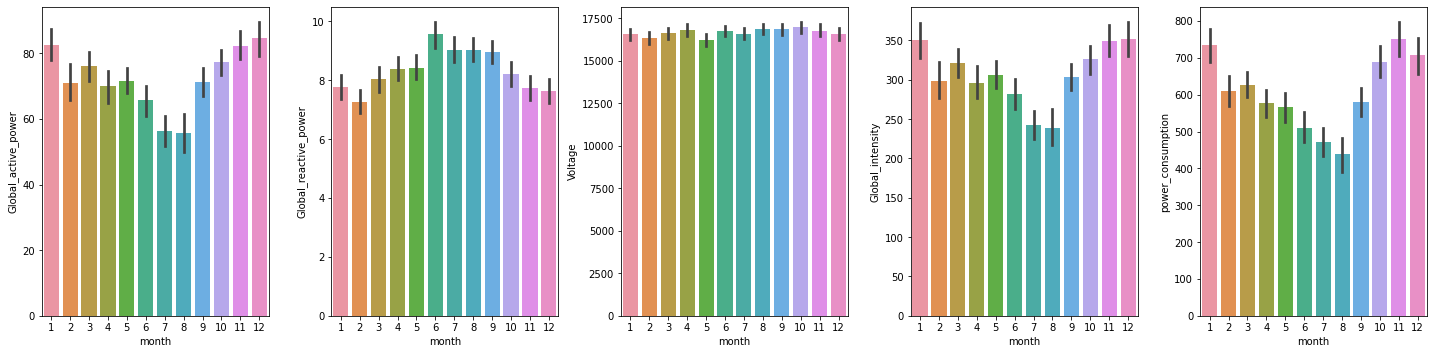

In [85]:

fig, ax = plt.subplots(ncols = 5, nrows = 1, figsize=(20,5))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if col not in ['Date', 'year', 'month']:
        sns.barplot(y = df[col], x = df['month'], data = df, ax=ax[index] )
        index += 1 
    if index == 5:
        break 
plt.tight_layout(pad=1, w_pad=1, h_pad=10.0)

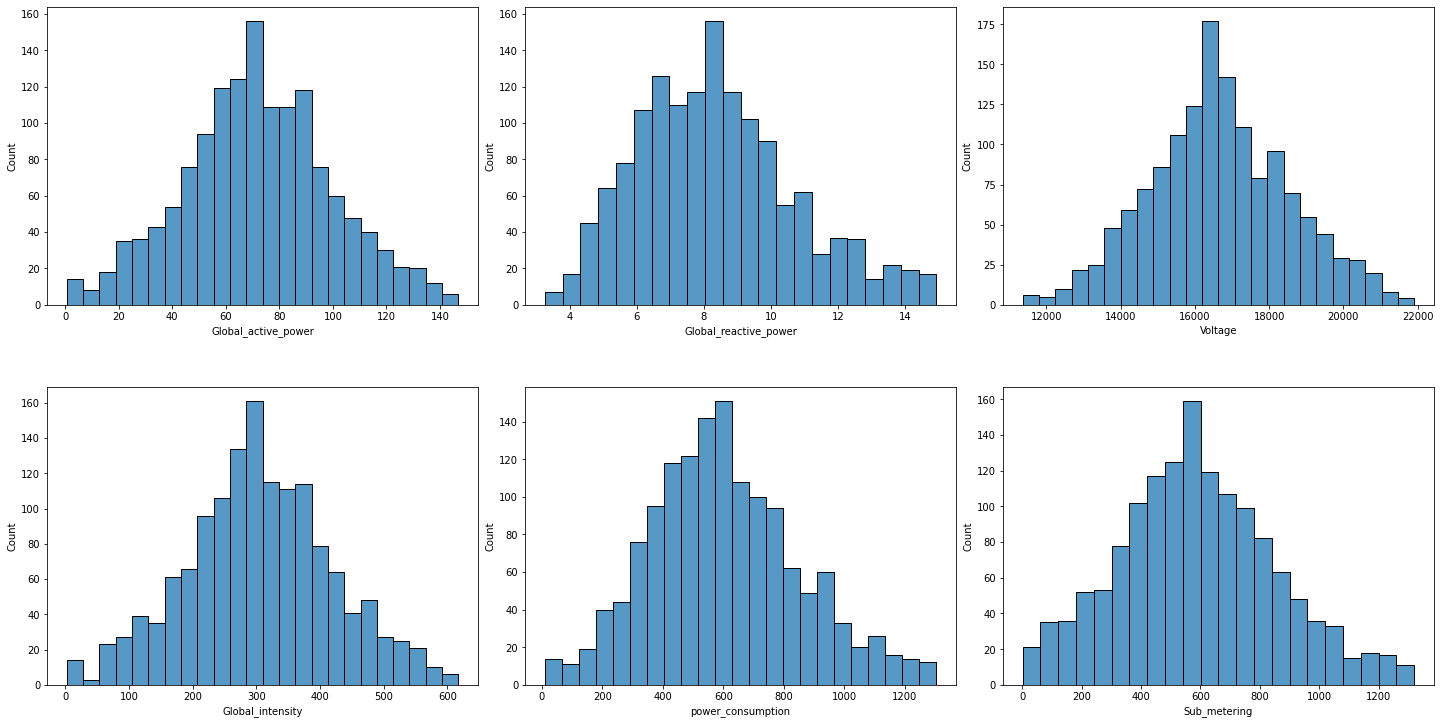

In [86]:
# Observation 
# 1) Power consumption in November and January are on higher side
# 2) Voltage is almost equal in every month
# Histplot


fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if col not in ['Date', 'year', 'month']:
        sns.histplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

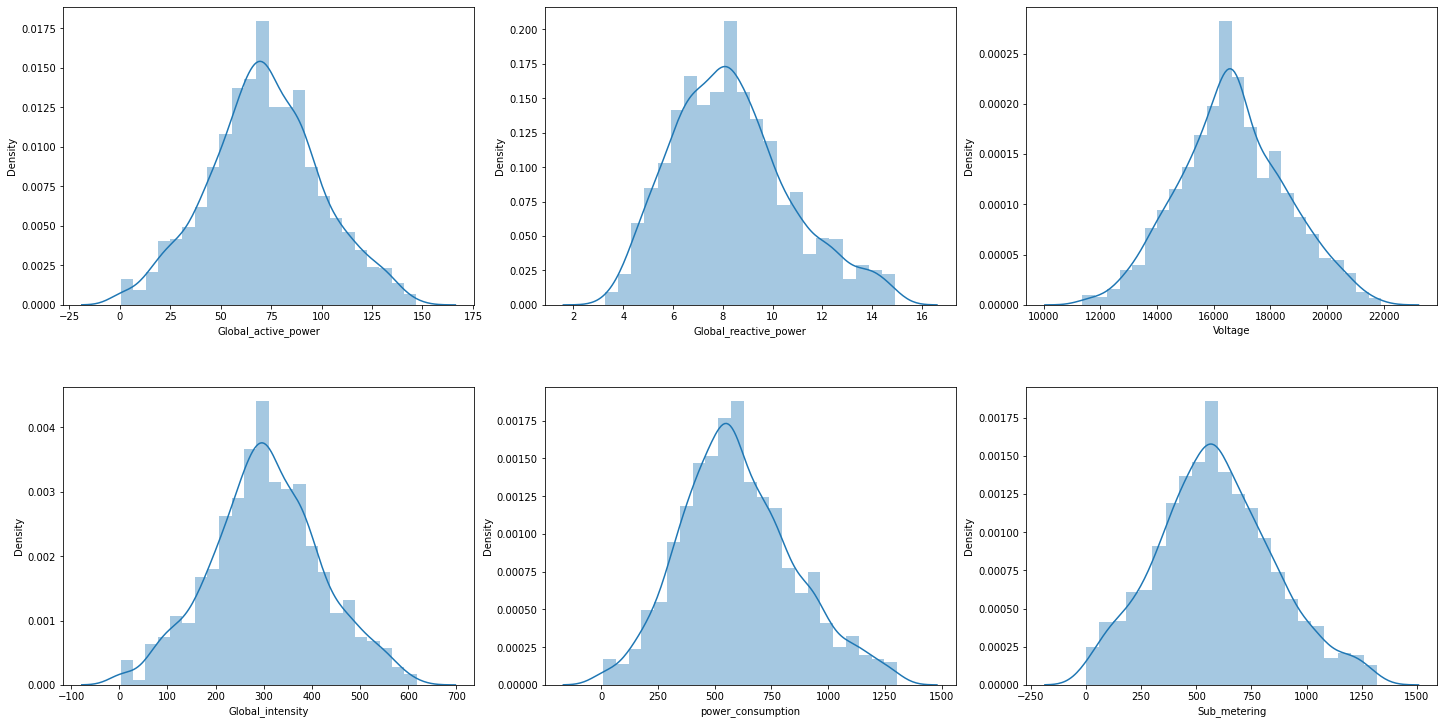

In [87]:
# DistPlot



fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if col not in ['Date', 'year', 'month']:
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [89]:
# Statistical Analysis
df.head

<bound method NDFrame.head of            Date  Global_active_power  Global_reactive_power   Voltage  \
16   2007-01-01              136.092                  8.790  17063.52   
17   2007-01-02               96.230                  7.922  20438.87   
18   2007-01-03               25.416                  4.938  17871.77   
19   2007-01-04               97.752                  8.124  14654.69   
20   2007-01-05               72.016                  7.874  15283.45   
...         ...                  ...                    ...       ...   
1437 2010-12-07               70.684                  8.100  18744.24   
1438 2010-12-08               25.102                  6.894  15893.26   
1439 2010-12-09               82.882                  9.076  19335.42   
1440 2010-12-10               87.174                  9.936  15140.72   
1441 2010-12-11               92.898                  6.646  15726.99   

      Global_intensity  year  month  power_consumption  Sub_metering  
16               563.4

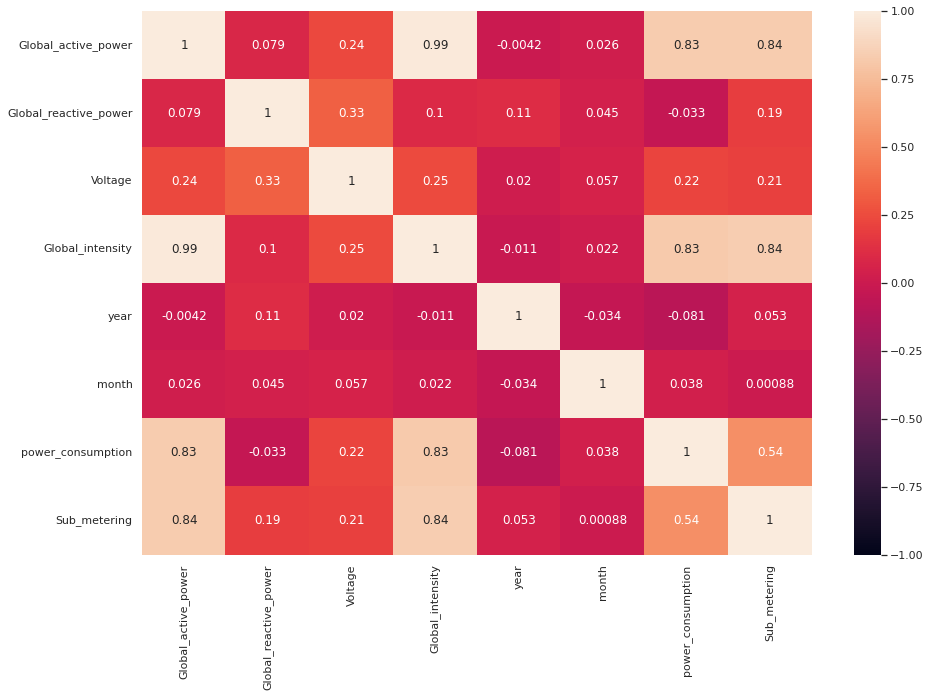

In [90]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=df.corr(), annot=True,  vmin=-1, vmax=1)

In [91]:
#Observation 
# Global_active_power, Global_intensity and sub_metering are higly correlated


df.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,1426.0,71.833571,27.674119,0.60,54.207500,71.5,89.6380,146.872000
Global_reactive_power,1426.0,8.349353,2.372718,3.26,6.629500,8.1,9.7295,14.934000
Voltage,1426.0,16658.506129,1888.107896,11361.00,15414.090000,16618.0,17931.0825,21911.440000
Global_intensity,1426.0,304.934642,114.897501,2.60,231.450000,303.6,378.6000,617.200000
year,1426.0,2008.462833,1.106450,2007.00,2007.000000,2008.0,2009.0000,2010.000000
month,1426.0,6.437588,3.410299,1.00,3.000000,6.0,9.0000,12.000000
power_consumption,1426.0,603.275222,249.636355,9.00,430.666667,578.0,760.0500,1304.166667
Sub_metering,1426.0,589.271388,266.565543,1.00,412.250000,578.0,756.0000,1320.000000


In [92]:
# Observation 
# 1) Maximum power consumption in a day is 2146 w/h
# 2) Average consumption is 631 w/h
# 3) Minimum cosmption is 21 w/h

# Segregating Independent and Dependent Features


X = df.iloc[ : , [1,2,3,4,6,8]]
y = df.iloc[ : , -2]

In [93]:
X.shape

(1426, 6)

In [94]:
y.shape

(1426,)

In [95]:
X.head

<bound method NDFrame.head of       Global_active_power  Global_reactive_power   Voltage  Global_intensity  \
16                136.092                  8.790  17063.52             563.4   
17                 96.230                  7.922  20438.87             403.2   
18                 25.416                  4.938  17871.77             105.0   
19                 97.752                  8.124  14654.69             410.4   
20                 72.016                  7.874  15283.45             316.2   
...                   ...                    ...       ...               ...   
1437               70.684                  8.100  18744.24             307.0   
1438               25.102                  6.894  15893.26             108.8   
1439               82.882                  9.076  19335.42             352.2   
1440               87.174                  9.936  15140.72             375.2   
1441               92.898                  6.646  15726.99             398.0   

      mon

In [96]:
y.head

<bound method NDFrame.head of 16      578.000000
17      900.833333
18      319.600000
19      616.200000
20      534.266667
           ...    
1437    529.066667
1438    184.366667
1439    721.366667
1440    806.900000
1441    957.300000
Name: power_consumption, Length: 1426, dtype: float64>

In [ ]:
##### Regplot


fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if col not in ['Date', 'year', 'month']:
        sns.regplot(x = df[col],y = df["power_consumption"], data = df , ax = ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [97]:
# ## Train Test Split

from sklearn.model_selection import train_test_split

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=7,test_size=0.33)

In [99]:

from sklearn.preprocessing import StandardScaler

In [100]:
scaler=StandardScaler()

In [101]:
X_train = scaler.fit_transform(X_train)

In [102]:
X_test = scaler.transform(X_test)

In [103]:
len(X_train)

955

In [109]:
# ## 8) Save Preprocess Model Data Using Pickle


preprocess_model = [X_train,y_train,X_test,y_test]

In [111]:

import pickle
pickle.dump(preprocess_model, open('preprocess_model.pkl','wb'))

In [112]:
preprocess_model = pickle.load(open('preprocess_model.pkl','rb'))

In [113]:
# Save Data into MongoDb
y_train.T

398     962.366667
183     705.466667
88      714.700000
86      857.733333
667     779.566667
           ...    
227     285.400000
518     489.300000
553     331.133333
1236    434.233333
191     385.766667
Name: power_consumption, Length: 955, dtype: float64

In [114]:
database_df = pd.DataFrame([X_train.T[0],X_train.T[1],X_train.T[2],X_train.T[3], X_train.T[4], X_train.T[5],y_train]).T

In [115]:
database_df.columns=['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity', 'month', 'Sub_metering', 'power_consumption']


In [116]:
database_df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,month,Sub_metering,power_consumption
0,1.267715,-1.119104,1.008056,1.290668,-1.610153,0.803794,962.366667
1,1.033360,2.302625,1.901971,1.065227,-0.137828,1.382305,705.466667
2,0.345639,-0.224568,0.779935,0.319672,-1.021223,0.156321,714.700000
3,0.436445,-0.424951,0.282685,0.442156,-1.021223,-0.234461,857.733333
4,0.413946,-0.029258,1.025325,0.388902,1.040032,0.026060,779.566667


In [117]:
l=[]
for i ,row in database_df.iterrows():
    l.append(dict(row))

In [118]:
get_ipython().system('pip install pymongo')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [123]:
import pymongo
from pymongo import MongoClient

In [124]:
client = pymongo.MongoClient("mongodb://localhost:27017")

In [125]:

db=client['Household_Power_Preprocessed_Data']
collections = db['Training Independent_and_Dependent_Dataset']
collections.insert_many(l)


ServerSelectionTimeoutError: ignored

In [ ]:

preprocess_model = pickle.load(open('preprocess_model.pkl','rb'))

In [ ]:
X_train = preprocess_model[0]
y_train = preprocess_model[1]
X_test = preprocess_model[2]
y_test = preprocess_model[3]

In [ ]:
X_train =pd.DataFrame(X_train)
X_test =pd.DataFrame(X_test)
X_train.columns=['Global_active_power', 'Global_reactive_power', 'Voltage','Global_intensity', 'month', 'Sub_metering']
X_test.columns=['Global_active_power', 'Global_reactive_power', 'Voltage','Global_intensity', 'month','Sub_metering']



In [ ]:
#  VIF Check To check multicollinearty


X_train2 = X_train.copy()
X_train= pd.DataFrame(X_train)

In [ ]:
X_train

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(X_train.columns)
print(vif)

In [ ]:
while (max(vif) > 5):    
    indx = vif.index(max(vif)) #Get the index of variable with highest VIF
    print(indx)
    X_train.drop(X_train.columns[indx],axis = 1, inplace = True)
    vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(X_train.columns)
print(vif)

In [ ]:
X_test = pd.DataFrame(X_test)
X_test = X_test[X_train.columns]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {"splitter":["best","random"],
"max_depth" : [1,3,5,7,9,11,12],
"min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
"max_features":["auto","log2","sqrt",None],
"max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]

In [ ]:
## We will train that models
models = {1: DecisionTreeRegressor(random_state=0),
          2: ExtraTreeRegressor(random_state=0),
          3: GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid=parameters,verbose=1, cv=3),
          4: GridSearchCV(ExtraTreeRegressor(random_state=42), param_grid=parameters,verbose=1, cv=3)
}

In [ ]:
map_keys = list(models.keys())

In [ ]:
# Get model name using id from linear_model_collection
def get_model_building_technique_name(num):
    if num == 1:
        return 'DecisionTreeRegressor()'
    if num == 2:
        return 'ExtraTreeRegressor()'
    if num == 3:
        return "GridSearchCV()_DTR"
    if num == 4:
        return "GridSearchCV()_ETR"
        return ''

In [ ]:
results = [];
for key_index in range(len(map_keys)):
    key = map_keys[key_index]
    model = models[key]
    print(key_index)
    model.fit(X_train, y_train)
    
    '''Test Accuracy'''
    y_pred = model.predict(pd.DataFrame(X_test))
    R_Squared_Test = r2_score(y_test,y_pred)
    Adjusted_R_Squared_Test = (1 - (1-R_Squared_Test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

    '''Train Accuracy'''
    y_pred_train = model.predict(X_train)
    R_Squared_Train = r2_score(y_train,y_pred_train)
    Adjusted_R_Squared_Train = (1 - (1-R_Squared_Train)*(len(y_train)-1)/(len(y_train)-X_test.shape[1]-1))
    results.append({'Model Name' : get_model_building_technique_name(key),
                    'Trained Model' : model,
                    'R_Squared_Test' : R_Squared_Test,
                    'Adjusted_R_Squared_Test' : Adjusted_R_Squared_Test,
                    'R_Squared_Train' : R_Squared_Train,
                    'Adjusted_R_Squared_Train' : Adjusted_R_Squared_Train
    })

In [ ]:
#Train and Test Accuracy
print(results)